# OPTICS

## 模型

基于密度的聚类模型，优于 [DBSCAN 模型](./DBSCAN.ipynb):

1. 解决密度差异大的情形处理不优的问题 (Eps 不敏感)

2. 可以生成可达性图，可解释性更强

## 实现

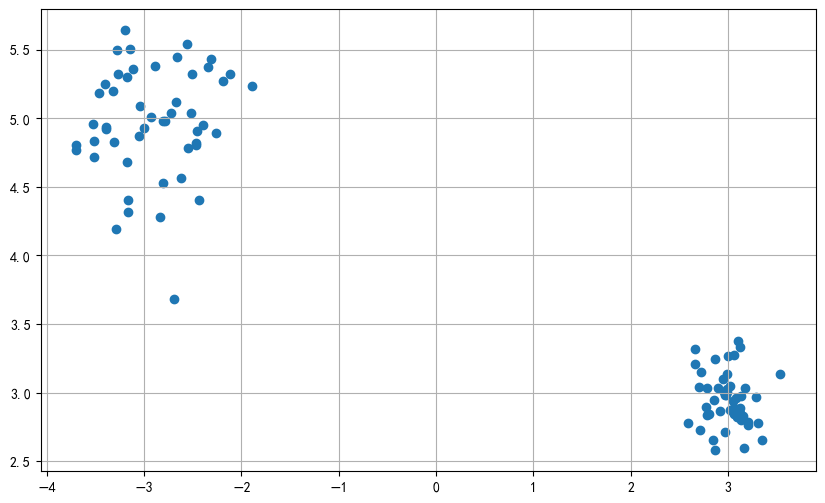

In [128]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei,sans-serif' # 中文支持

#! 修改输入数据
data = np.concat((
    np.random.normal((3, 3), 0.2, (50, 2)),    
    np.random.normal((-3, 5), 0.4, (50, 2)),    
), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[:, 0], data[:, 1])
ax.grid(True)

### 拟合

In [129]:
from sklearn.cluster import OPTICS

optics = OPTICS(
    # 一个核心点周围最少几个点
    min_samples = 5,
    # 领域搜索上限
    max_eps = 0.7,
    algorithm = 'auto',
)

optics.fit(data)

,min_samples,5
,max_eps,0.7
,metric,'minkowski'
,p,2
,metric_params,None
,cluster_method,'xi'
,eps,None
,xi,0.05
,predecessor_correction,True
,min_cluster_size,None
,algorithm,'auto'


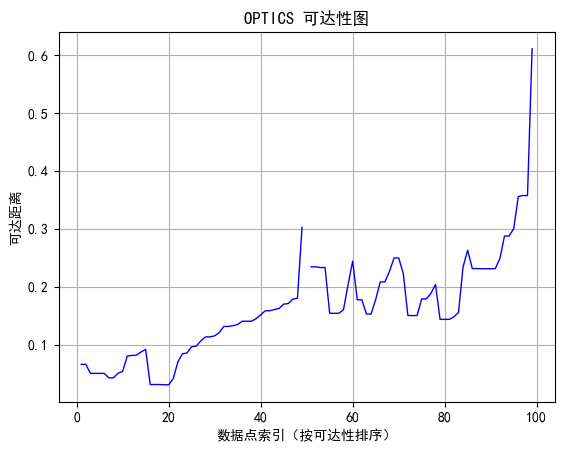

In [130]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei,sans-serif' # 中文支持

x_labels = range(len(optics.reachability_))
reachability = optics.reachability_[optics.ordering_]
reachability[np.isinf(reachability)] = np.max(reachability[~np.isinf(reachability)])

plt.plot(x_labels, optics.reachability_[optics.ordering_], color='blue', lw=1)


plt.title("OPTICS 可达性图")
plt.xlabel("数据点索引（按可达性排序）")
plt.ylabel("可达距离")
plt.grid(True)

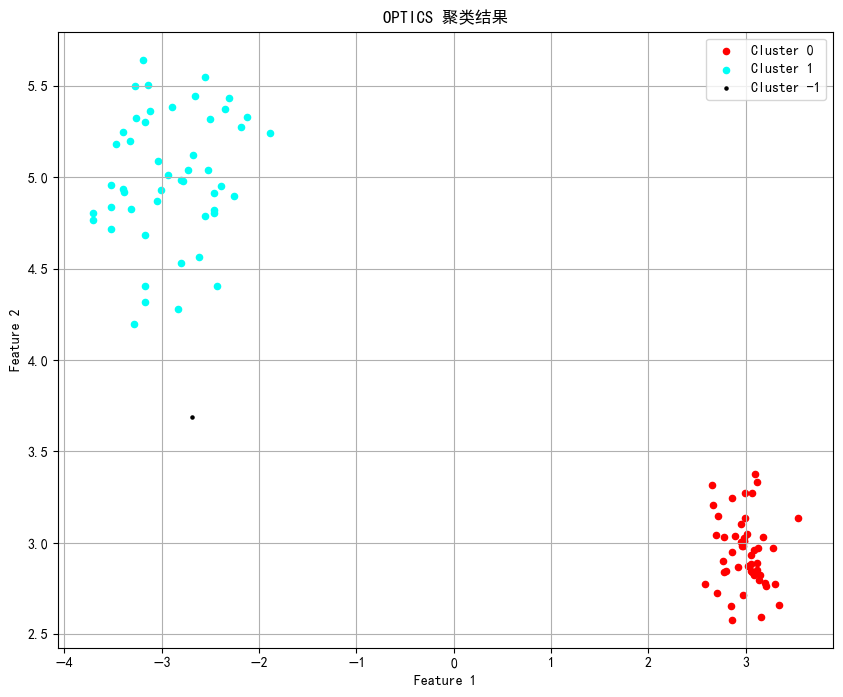

In [131]:
from sklearn.cluster import cluster_optics_dbscan
from matplotlib import colormaps

# 根据可达性图，手动选择一个 epsilon 值来提取簇
# 假设我们从图中观察到，0.25 可能是一个好的阈值
labels = cluster_optics_dbscan(
    reachability=optics.reachability_,
    core_distances=optics.core_distances_,
    ordering=optics.ordering_,
    eps=0.5  # 根据可达性图选择的阈值
)

# 可视化最终的聚类结果
plt.figure(figsize=(10, 8))
unique_labels = set(labels)
colors = colormaps['hsv'](np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:  # -1 标签代表噪声点
        color = 'k'
        marker = '.'
    else:
        color = col
        marker = 'o'

    class_member_mask = (labels == k)
    xy = data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker, s=20, label=f'Cluster {k}')

plt.title("OPTICS 聚类结果")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)